In [ ]:
Introduction¶
Activities
Find publicly available data of your interest with time variable. Download them, and finally change the date column of the variable using datetime library.

I believe the best way to learn is by doing. Motivation is high when you are working on a subject of personal interest.

To take advantage of the small class, I would like to make the activities personalized to a data set of your interest. After each lecture, when you are off to do your activities, I would like you to try doing the activities/exercises on the data set of your choosing. Here are some examples of time series data:

- [Yahoo Finance](https://finance.yahoo.com/) historical stock/bond/ETF price data
- [St. Louis Fed](https://fred.stlouisfed.org/series/GDP) or [BLS](https://www.bls.gov/data/#unemployment) for any macroeconomic data
- [COVID](https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide)
- [Google Trends](https://trends.google.com/trends/?geo=US)

In [82]:
import pandas as pd
data=pd.read_csv("BTC_time.csv", index_col=[0], parse_dates=[0])

In [83]:
data.head()

,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Currency,,,,,
BTC,2013-10-01,123.65499,124.30466,124.75166,122.56349
BTC,2013-10-02,125.45500,123.65499,125.75850,123.63383
BTC,2013-10-03,108.58483,125.45500,125.66566,83.32833
BTC,2013-10-04,118.67466,108.58483,118.67500,107.05816
BTC,2013-10-05,121.33866,118.67466,121.93633,118.00566


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2658 entries, 0 to 2657
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2658 non-null   object 
 1   Date                 2658 non-null   object 
 2   Closing Price (USD)  2658 non-null   float64
 3   24h Open (USD)       2658 non-null   float64
 4   24h High (USD)       2658 non-null   float64
 5   24h Low (USD)        2658 non-null   float64
dtypes: float64(4), object(2)
memory usage: 124.7+ KB


In [84]:
data.describe()

,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
count,2658.000000,2658.000000,2658.000000,2658.000000
mean,4692.803296,4679.450765,4821.029695,4530.097771
std,5763.353168,5736.456570,5952.277139,5499.018279
min,108.584830,108.584830,118.675000,83.328330
25%,450.636122,450.354207,457.063000,442.305000
50%,2016.257500,1985.460625,2065.221875,1909.111250
75%,8054.903561,8044.300312,8255.565693,7806.781213
max,40519.448598,40558.102123,41962.362125,38766.276161


In [85]:
import pandas as pd
import numpy as np
from datetime import datetime

In [87]:
data['Date']

Currency
BTC    2013-10-01
BTC    2013-10-02
BTC    2013-10-03
BTC    2013-10-04
BTC    2013-10-05
          ...    
BTC    2021-01-29
BTC    2021-01-30
BTC    2021-01-31
BTC    2021-02-01
BTC    2021-02-02
Name: Date, Length: 2658, dtype: object

In [88]:
data.set_index('Date', inplace=True)
data.head()

,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,
2013-10-01,123.65499,124.30466,124.75166,122.56349
2013-10-02,125.45500,123.65499,125.75850,123.63383
2013-10-03,108.58483,125.45500,125.66566,83.32833
2013-10-04,118.67466,108.58483,118.67500,107.05816
2013-10-05,121.33866,118.67466,121.93633,118.00566


In [97]:
#taking only values for further analysis! 
series_value=data.values

In [99]:
data.size

10632

Text(0.5, 0, 'Year')

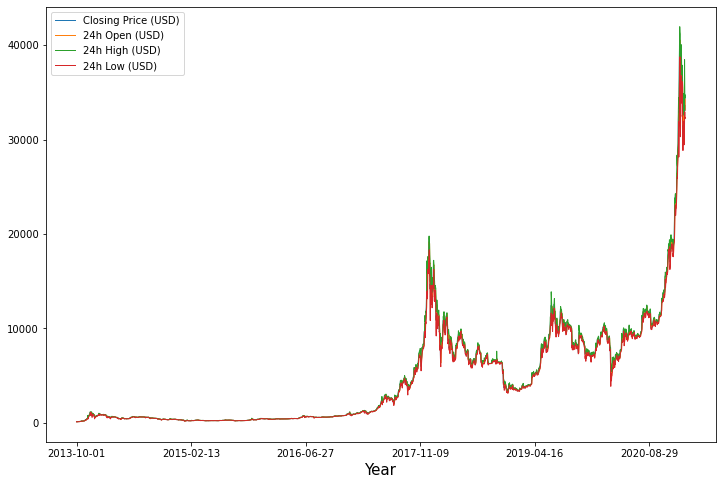

In [114]:
import matplotlib.pyplot as plt
data.plot(figsize=(12,8), linewidth=1, fontsize=10)
plt.xlabel('Year', fontsize=15)


In [109]:
#Now let's see the moving average
# the mean of the 2 year's Bitcoin value 

data_mean=data.rolling(window=730).mean()



Text(0.5, 0, 'Year')

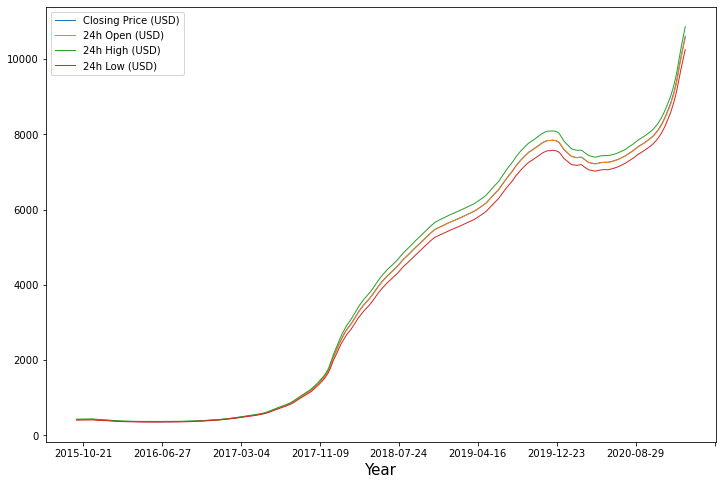

In [113]:
import matplotlib.pyplot as plt
data_mean.plot(figsize=(12,8), linewidth=1, fontsize=10)
plt.xlabel('Year', fontsize=15)


In [126]:
value=pd.DataFrame(series_value)

In [127]:
data_2=pd.concat([value,value.shift(1)],axis=1)

In [128]:
data_2.head()

,0,1,2,3,0,1,2,3
0,123.65499,124.30466,124.75166,122.56349,NaN,NaN,NaN,NaN
1,125.45500,123.65499,125.75850,123.63383,123.65499,124.30466,124.75166,122.56349
2,108.58483,125.45500,125.66566,83.32833,125.45500,123.65499,125.75850,123.63383
3,118.67466,108.58483,118.67500,107.05816,108.58483,125.45500,125.66566,83.32833
4,121.33866,118.67466,121.93633,118.00566,118.67466,108.58483,118.67500,107.05816


In [130]:
data_2.columns=['actual_closing','actual_Open','actual_High','actual_Low','forecasting_closing','forecasting_open','forecasting_high','forecasting_low']

In [131]:
data_2

,actual_closing,actual_Open,actual_High,actual_Low,forecasting_closing,forecasting_open,forecasting_high,forecasting_low
0,123.654990,124.304660,124.751660,122.563490,NaN,NaN,NaN,NaN
1,125.455000,123.654990,125.758500,123.633830,123.654990,124.304660,124.751660,122.563490
2,108.584830,125.455000,125.665660,83.328330,125.455000,123.654990,125.758500,123.633830
3,118.674660,108.584830,118.675000,107.058160,108.584830,125.455000,125.665660,83.328330
4,121.338660,118.674660,121.936330,118.005660,118.674660,108.584830,118.675000,107.058160
...,...,...,...,...,...,...,...,...
2653,33408.218337,30426.084401,33481.485418,29921.960077,30534.999373,32497.848461,32570.281502,29452.785594
2654,34842.557393,33424.595591,38468.078290,31984.008916,33408.218337,30426.084401,33481.485418,29921.960077
2655,34622.373232,34265.376658,34920.291147,32945.369976,34842.557393,33424.595591,38468.078290,31984.008916
2656,33087.369865,34304.234509,34373.734005,32229.545181,34622.373232,34265.376658,34920.291147,32945.369976


In [136]:
#squared of the current values
from sklearn.metrics import mean_squared_error
import numpy as np

data_test=data[1:]
data_test.columns=['actual_closing','actual_Open','actual_High','actual_Low','forecasting_closing','forecasting_open','forecasting_high','forecasting_low']

In [137]:
data_test.head()

,actual_closing,actual_Open,actual_High,actual_Low,forecasting_closing,forecasting_open,forecasting_high,forecasting_low
1,125.45500,123.65499,125.75850,123.63383,123.65499,124.30466,124.75166,122.56349
2,108.58483,125.45500,125.66566,83.32833,125.45500,123.65499,125.75850,123.63383
3,118.67466,108.58483,118.67500,107.05816,108.58483,125.45500,125.66566,83.32833
4,121.33866,118.67466,121.93633,118.00566,118.67466,108.58483,118.67500,107.05816
5,120.65533,121.33866,121.85216,120.55450,121.33866,118.67466,121.93633,118.00566


In [140]:
data_error=mean_squared_error(data_test.actual_closing,data_test.forecasting_closing)

In [144]:
#can it be a basemodel?? 
np.sqrt(data_error)

352.70945361969416

In [ ]:
#error rate should go down 

In [145]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

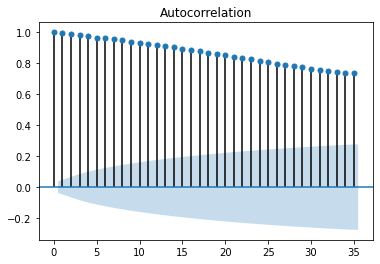

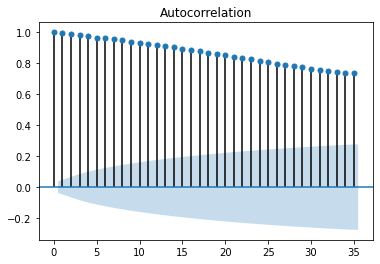

In [152]:
plot_acf(data_test.actual_closing)

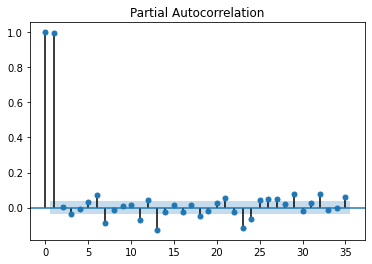

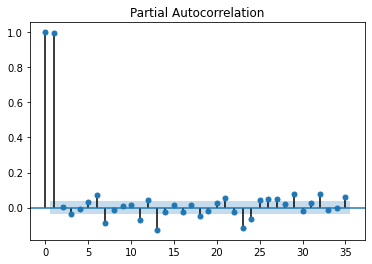

In [159]:
plot_pacf(data_test.actual_closing)